In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype('float32') / 255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

imput_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(imput_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(imput_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.2852 - val_loss: 0.1450
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - loss: 0.1409 - val_loss: 0.1279
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1268 - val_loss: 0.1198
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1199 - val_loss: 0.1152
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1152 - val_loss: 0.1114
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1122 - val_loss: 0.1096
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.1098 - val_loss: 0.1074
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.1079 - val_loss: 0.1054
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1066 - val_loss: 0.1050
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.1050 - val_loss: 0.1031
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


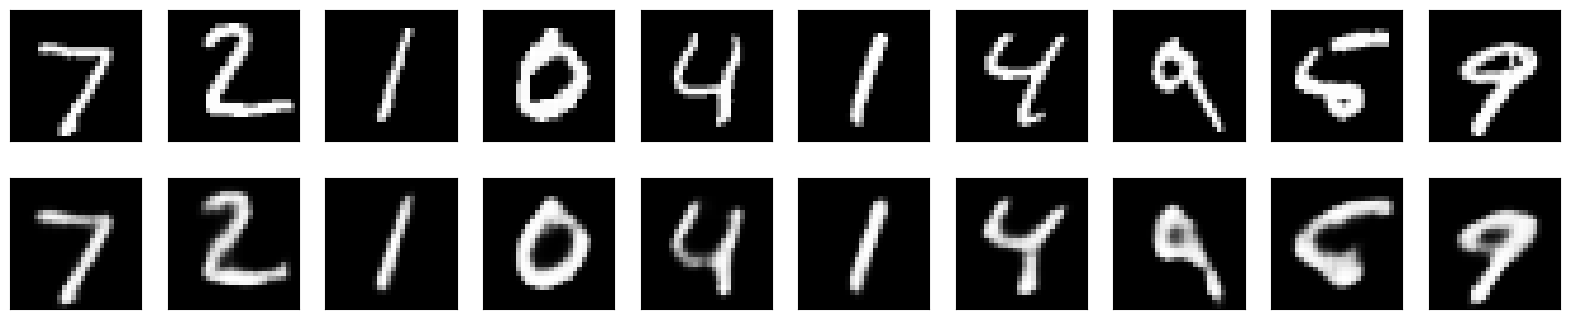

In [3]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()